<a href="https://colab.research.google.com/github/Arafat245/U-Extend_Codes/blob/main/Fig2SRVF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fdasrsf

In [ ]:
# random.randint(0, 1)

In [13]:
import random

Initializing...
Compute Karcher Mean of 5 function in SRSF space with lam=0.000000
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


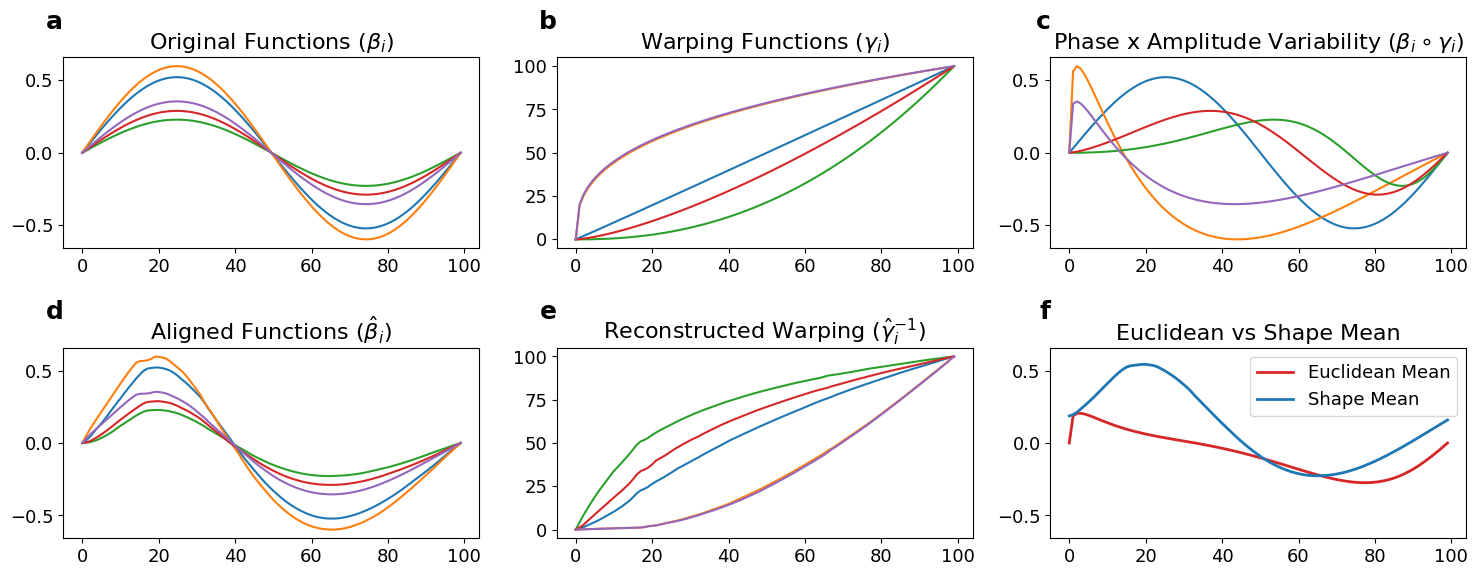

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from fdasrsf.utility_functions import *
from fdasrsf.fPLS import *
import fdasrsf as fs
# Set the global font size
plt.rcParams.update({'font.size': 13})  #

# Define your functions fn, gamma, srsf, and srsf_to_beta if they are custom
# For example:
def fn(t, z1, z2):
    return np.sin(2 * np.pi * t) * z2

def gamma(t):
    power = np.random.uniform(1, 3)

    if np.random.randint(0, 2) == 0:
        power = 1.0 / power

    return np.power(t, power)

def srsf(f, delta_t=0.01):
    f_deriv = np.gradient(f, delta_t)
    q = f_deriv / np.sqrt(np.abs(f_deriv) + np.finfo(float).eps)
    return q

def srsf_to_beta(q, delta_t=0.01):
    q_integral = np.cumsum(q * np.sqrt(np.abs(q) + np.finfo(float).eps) * delta_t)
    return q_integral

# Time vector
t = np.linspace(0, 1, 100)
a_i = np.linspace(-6, 6, 6)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 6), sharey='col')

# Initialize lists to store data
amplitudes = []
warps = []
phase_amplitudes = []
qs = []

# Generate synthetic data
for i in range(5):
    z1 = np.random.normal(0, 0.1)
    z2 = np.random.uniform(0.1, 1)

    amplitude = fn(t, z1, z2)
    warp = gamma(t)
    phase_amplitude = fn(warp, z1, z2)
    q = srsf(phase_amplitude, delta_t=1.0 / phase_amplitude.shape[0])

    amplitudes.append(amplitude)
    warps.append(warp)
    phase_amplitudes.append(phase_amplitude)

    axs[0, 0].plot(amplitude)
    axs[0, 1].plot(np.array(warp)*100)
    axs[0, 2].plot(phase_amplitude)

axs[0, 0].set_title(r'Original Functions ($\beta_i$)', fontsize=16)
axs[0, 1].set_title(r'Warping Functions ($\gamma_i$)', fontsize=16)
axs[0, 2].set_title(r'Phase x Amplitude Variability ($\beta_i \circ \gamma_i$)',fontsize=16)

ref = fn(t, 0, 0)

axs[1, 0].set_title(r'Aligned Functions ($\hat{\beta}_i$)', fontsize=16)
axs[1, 1].set_title(r'Reconstructed Warping ($\hat{\gamma}_i^{-1}$)', fontsize=16)
axs[1, 2].set_title('Euclidean vs Shape Mean', fontsize=16)

amplitudes = np.array(amplitudes)
qs = np.array(qs)

# Create fdawarp object
obj = fs.fdawarp(np.array(phase_amplitudes).T, t)  # Note the transpose to match dimensions

# Align functions
obj.srsf_align(parallel=True)

# Plot aligned data
for fn in obj.fn.T:
    axs[1, 0].plot(fn)

# Plot warping functions
for gam in obj.gam.T:
    axs[1, 1].plot(gam*100)

# Calculate and plot mean
axs[1, 2].plot(np.mean(phase_amplitudes, axis=0), c='tab:red', linewidth=2, label='Euclidean Mean')
axs[1, 2].plot(obj.fmean, c='tab:blue', linewidth=2, label='Shape Mean')
axs[1,2].legend()

# Add annotations
annotations = ['a', 'b', 'c', 'd', 'e', 'f']
positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

for i, (pos, annotation) in enumerate(zip(positions, annotations)):
    axs[pos].text(-0.0, 1.25, annotation, transform=axs[pos].transAxes,
                  fontsize=18, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.savefig("Fig2.png", dpi=300,bbox_inches='tight')
plt.show()


In [ ]:
np.mean(phase_amplitudes, axis=0).shape

(100,)

Initializing...
Compute Karcher Mean of 1 function in SRSF space with lam=0.000000
updating step: r=1


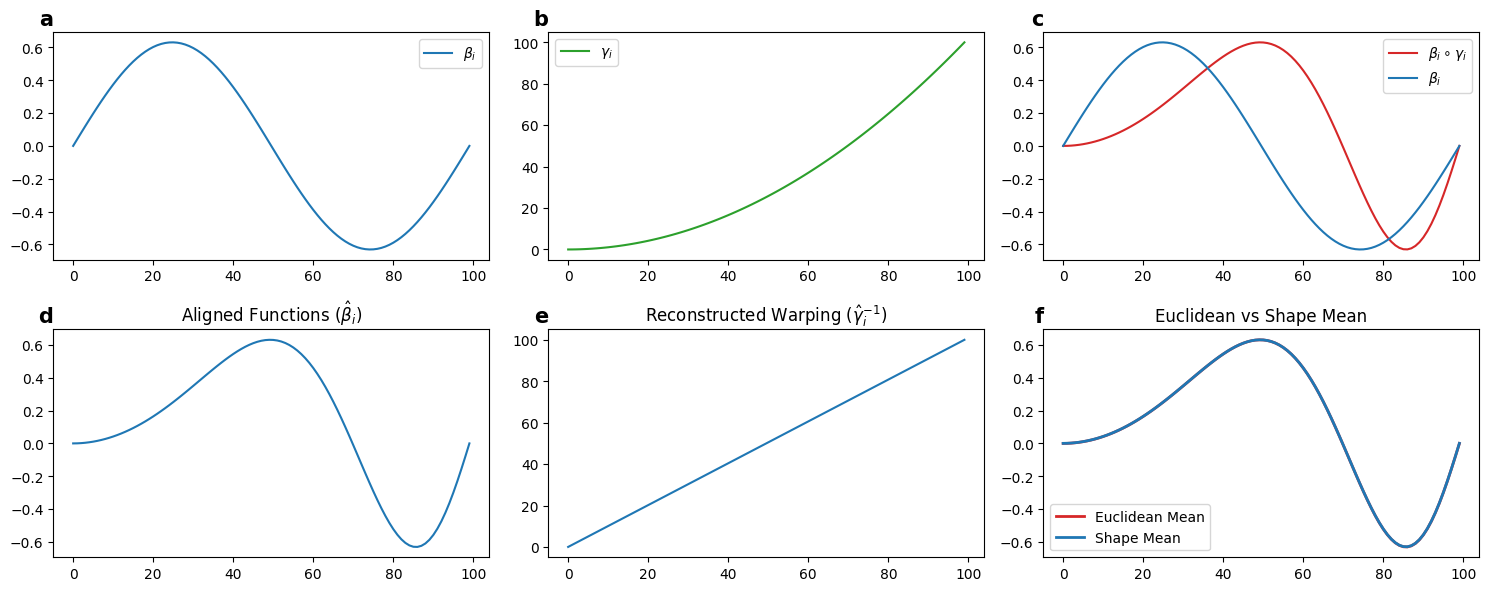

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from fdasrsf.utility_functions import *
from fdasrsf.fPLS import *
import fdasrsf as fs

# Define your functions fn, gamma, srsf, and srsf_to_beta if they are custom
# For example:
def fn(t, z1, z2):
    return np.sin(2 * np.pi * t) * z2

def gamma(t):
    power = np.random.uniform(1, 3)

    if np.random.randint(0, 2) == 0:
        power = 1.0 / power

    return np.power(t, power)

def srsf(f, delta_t=0.01):
    f_deriv = np.gradient(f, delta_t)
    q = f_deriv / np.sqrt(np.abs(f_deriv) + np.finfo(float).eps)
    return q

def srsf_to_beta(q, delta_t=0.01):
    q_integral = np.cumsum(q * np.sqrt(np.abs(q) + np.finfo(float).eps) * delta_t)
    return q_integral

# Time vector
t = np.linspace(0, 1, 100)
a_i = np.linspace(-6, 6, 6)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

# Initialize lists to store data
amplitudes = []
warps = []
phase_amplitudes = []
qs = []

# Generate synthetic data
for i in range(1):
    z1 = np.random.normal(0, 0.1)
    z2 = np.random.uniform(0.1, 1)

    amplitude = fn(t, z1, z2)
    warp = gamma(t)
    phase_amplitude = fn(warp, z1, z2)
    q = srsf(phase_amplitude, delta_t=1.0 / phase_amplitude.shape[0])

    amplitudes.append(amplitude)
    warps.append(warp)
    phase_amplitudes.append(phase_amplitude)

    axs[0, 0].plot(amplitude, color='tab:blue', label=r'$\beta_i$')
    axs[0, 1].plot(np.array(warp)*100, color='tab:green', label=r'$\gamma_i$')
    axs[0, 2].plot(phase_amplitude, color='tab:red', label=r'$\beta_i \circ \gamma_i$')
    axs[0, 2].plot(amplitude, color='tab:blue', label=r'$\beta_i$')

axs[0,1].legend()
axs[0,0].legend()
axs[0,2].legend()
#axs[0, 0].set_title()
##axs[0, 1].set_title(r'$\gamma_i$')
#axs[0, 2].set_title()

ref = fn(t, 0, 0)

axs[1, 0].set_title(r'Aligned Functions ($\hat{\beta}_i$)')
axs[1, 1].set_title(r'Reconstructed Warping ($\hat{\gamma}_i^{-1}$)')
axs[1, 2].set_title('Euclidean vs Shape Mean')

amplitudes = np.array(amplitudes)
qs = np.array(qs)

# Create fdawarp object
obj = fs.fdawarp(np.array(phase_amplitudes).T, t)  # Note the transpose to match dimensions

# Align functions
obj.srsf_align(parallel=True)

# Plot aligned data
for fn in obj.fn.T:
    axs[1, 0].plot(fn)

# Plot warping functions
for gam in obj.gam.T:
    axs[1, 1].plot(gam*100)

# Calculate and plot mean
axs[1, 2].plot(np.mean(phase_amplitudes, axis=0), c='tab:red', linewidth=2, label='Euclidean Mean')
axs[1, 2].plot(obj.fmean, c='tab:blue', linewidth=2, label='Shape Mean')
axs[1,2].legend()

# Add annotations
annotations = ['a', 'b', 'c', 'd', 'e', 'f']
positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

for i, (pos, annotation) in enumerate(zip(positions, annotations)):
    axs[pos].text(-0.0, 1.1, annotation, transform=axs[pos].transAxes,
                  fontsize=15, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.savefig("Fig2.png", dpi=300,bbox_inches='tight')
plt.show()


In [ ]:
gamma_inv = fs.utility_functions.invertGamma(warp)

In [ ]:
phase_amplitude

array([ 0.00000000e+00,  5.23447264e-02,  9.49233820e-02,  1.33830609e-01,
        1.70001616e-01,  2.03779901e-01,  2.35311542e-01,  2.64657725e-01,
        2.91838891e-01,  3.16855385e-01,  3.39698288e-01,  3.60355560e-01,
        3.78815717e-01,  3.95070132e-01,  4.09114485e-01,  4.20949705e-01,
        4.30582557e-01,  4.38025997e-01,  4.43299362e-01,  4.46428435e-01,
        4.47445425e-01,  4.46388872e-01,  4.43303504e-01,  4.38240043e-01,
        4.31254984e-01,  4.22410341e-01,  4.11773368e-01,  3.99416264e-01,
        3.85415860e-01,  3.69853294e-01,  3.52813671e-01,  3.34385716e-01,
        3.14661428e-01,  2.93735712e-01,  2.71706024e-01,  2.48672007e-01,
        2.24735123e-01,  1.99998291e-01,  1.74565529e-01,  1.48541589e-01,
        1.22031607e-01,  9.51407528e-02,  6.79738869e-02,  4.06352253e-02,
        1.32280116e-02, -1.41458009e-02, -4.13858590e-02, -6.83937066e-02,
       -9.50730728e-02, -1.21330147e-01, -1.47073840e-01, -1.72216039e-01,
       -1.96671835e-01, -

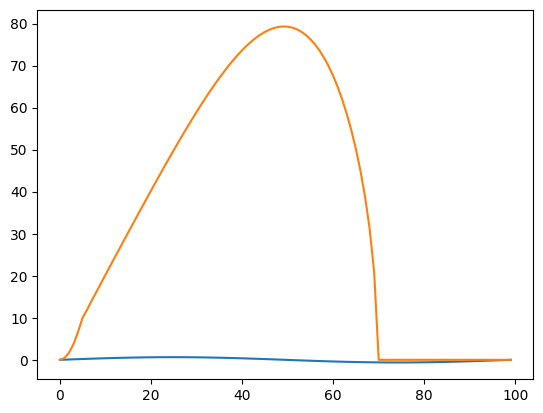

In [ ]:
plt.plot(amplitude)
plt.plot(fs.utility_functions.warp_f_gamma(t*100, gamma_inv*100, phase_amplitude))

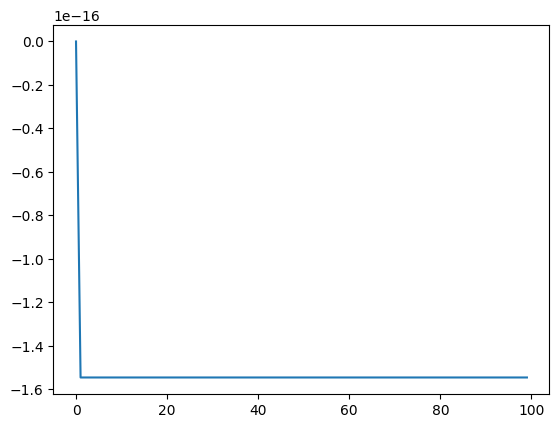

In [ ]:
#plt.plot(phase_amplitude)
plt.plot(fs.utility_functions.warp_f_gamma(t*100, phase_amplitude, gamma_inv*100))

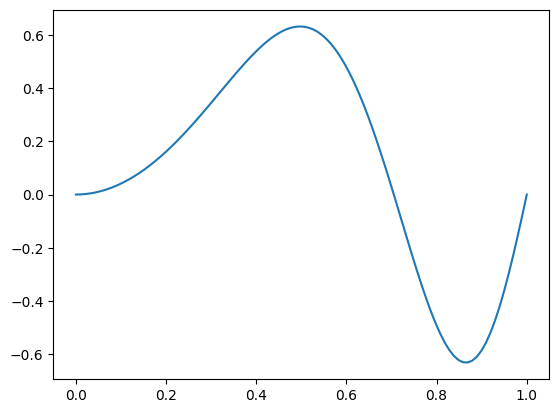

In [ ]:
plt.plot(t, phase_amplitude)